In [376]:
import numpy as np
import pandas as pd
import random as rd


In [377]:
df=pd.read_csv('CC General.csv')

In [378]:
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [380]:
df.isna().mean()*100


CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [381]:
df.drop(["CUST_ID"],axis=1,inplace=True)

In [382]:
df.dropna(subset=["CREDIT_LIMIT"],inplace=True)

In [383]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace=True)

In [384]:
df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


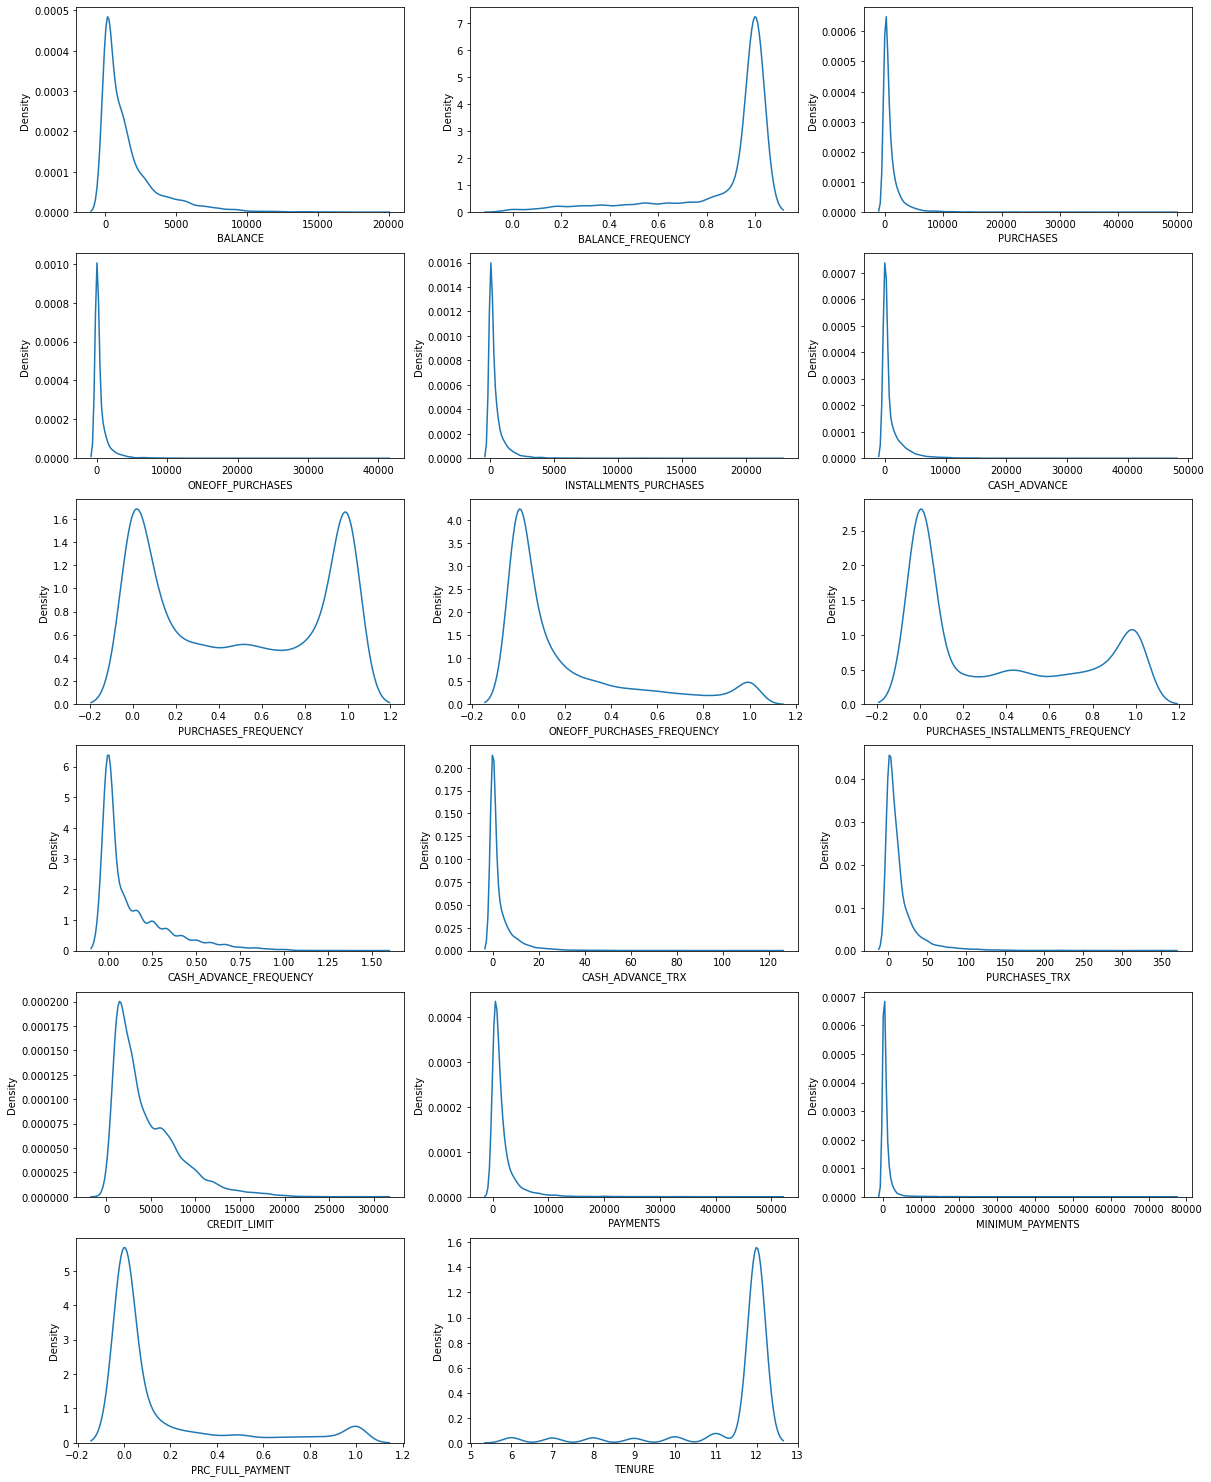

In [385]:
plt.figure(figsize=(20,40))
for i,column in enumerate(df.columns):
    if df[column].dtype!= 'object':
        axes=plt.subplot(9,3,i+1)
        sns.kdeplot(df[column],ax=axes)
plt.show()

# K means

In [386]:
x1 = df["PURCHASES"].to_list()
x2 = df["ONEOFF_PURCHASES"].to_list()



In [387]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

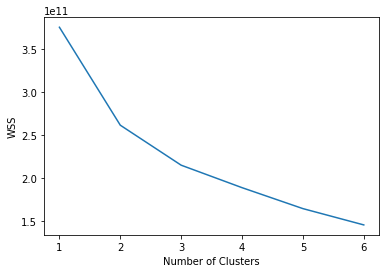

In [388]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_score={}
for k in range(1,7):
    obj=KMeans(n_clusters=k)
    obj.fit(X_red)
    kmeans_score[k]=obj.inertia_
plt.figure()
plt.plot(list(kmeans_score.keys()),list(kmeans_score.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

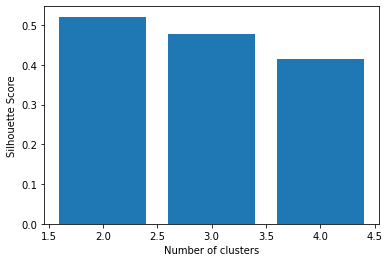

In [389]:
score = []

for k in range(2,5):
    score.append( 
        silhouette_score(X_red, KMeans(n_clusters = k).fit_predict(X_red))) 
#     objtemp=silhouette_score(X_red, KMeans(n_clusters = k)
#     objtemp.fit_predict(X_red)
#     score.append(obj_temp)
k = [2, 3, 4] 
plt.bar(k, score) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 



In [390]:
import math

def kmeans(x1,x2,k):
    centroids = []
    clusters = []
    for i in range(k):
        clusters.append([])
    
    for i in range(k):
        p1 = x1[i]
        p2 = x2[i]
        t = (p1,p2)
        centroids.append(t)
        
    for g in range(k):
        clusters[g].append(centroids[g])

    for i in range(len(x1)):
        if(i>=k):
            p1 = x1[i]
            p2 = x2[i]
            all_dists = []
            for j in range(k):
                d = math.sqrt(((p1-centroids[j][0])**2)+((p2-centroids[j][1])**2))
                all_dists.append(d)
            minValue = min(all_dists)
            min_ind = all_dists.index(minValue)
            p = (p1,p2)
            clusters[min_ind].append(p)
            updated_centroid = (((centroids[min_ind][0]+p1)/2),((centroids[min_ind][1]+p2)/2))
            centroids[min_ind] = updated_centroid  
    points = []
    for i in range(len(x1)):
        p = (x1[i],x2[i])
        for j in range(len(clusters)):
            if p in clusters[j]:
                break
        points.append(j)
    
    return points


In [391]:
points = kmeans(x1,x2,3)
print(len(x1))


8949


In [392]:
X = df.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [400]:
df['Cluster'] = points
df.head(300)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,635.090434,0.818182,5758.71,2252.37,3506.34,0.000000,0.750000,0.250000,0.750000,0.000000,0,48,2900.0,7943.570210,197.416104,1.000000,12,0
296,1521.168100,1.000000,245.98,245.98,0.00,2792.675970,0.166667,0.166667,0.000000,0.250000,3,2,6000.0,2261.523522,388.258009,0.000000,12,1
297,5547.092593,1.000000,0.00,0.00,0.00,3298.958165,0.000000,0.000000,0.000000,0.083333,2,0,12000.0,1786.142816,1351.998523,0.000000,12,1
298,2503.107213,1.000000,733.90,733.90,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,13,3000.0,1620.193277,857.535876,0.000000,12,1


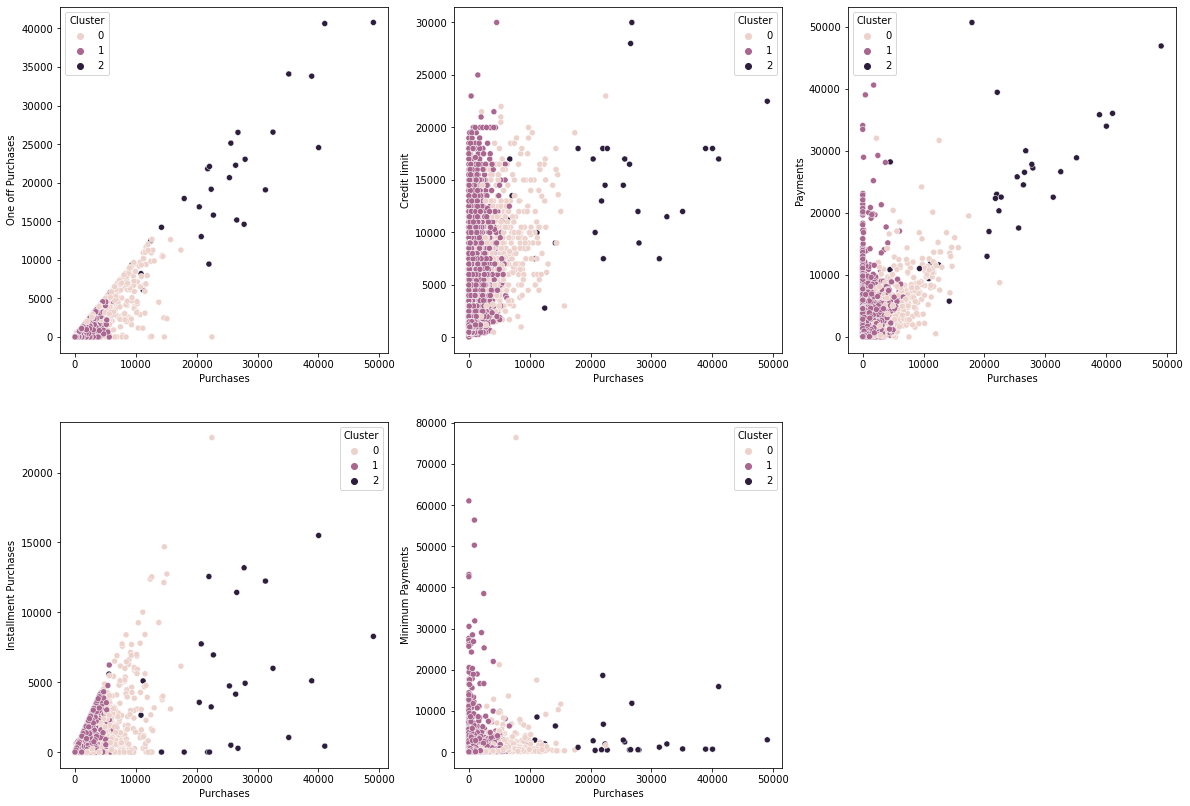

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
sns.scatterplot(data=df, x='PURCHASES', y='ONEOFF_PURCHASES', hue='Cluster')
plt.xlabel('Purchases')
plt.ylabel('One off Purchases')

plt.subplot(2,3,2)
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster')
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,3,3)
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS', hue='Cluster')
plt.xlabel('Purchases')
plt.ylabel('Payments')

plt.subplot(2,3,4)
sns.scatterplot(data=df, x='PURCHASES', y='INSTALLMENTS_PURCHASES', hue='Cluster')
plt.xlabel('Purchases')
plt.ylabel('Installment Purchases')

plt.subplot(2,3,5)
sns.scatterplot(data=df, x='PURCHASES', y='MINIMUM_PAYMENTS', hue='Cluster')
plt.xlabel('Purchases')
plt.ylabel('Minimum Payments')
plt.show()

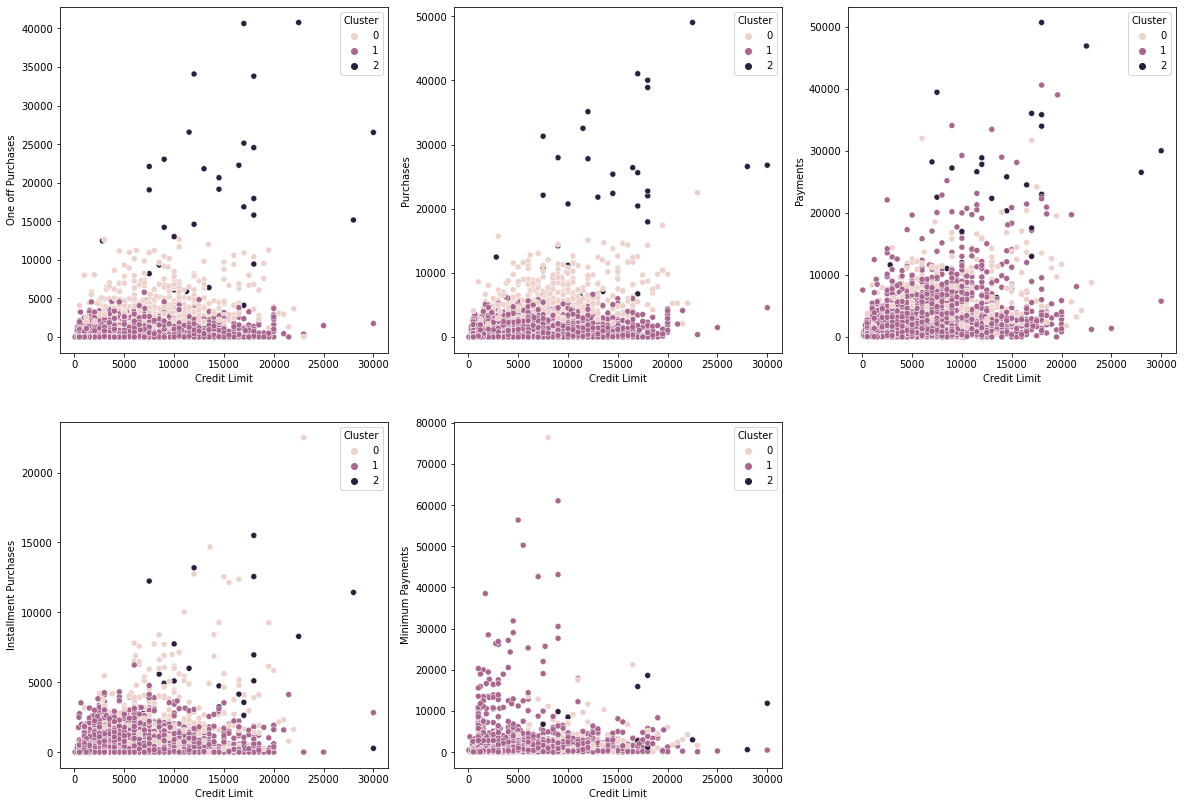

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('One off Purchases')

plt.subplot(2,3,2)
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')

plt.subplot(2,3,3)
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PAYMENTS', hue='Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('Payments')

plt.subplot(2,3,4)
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES', hue='Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('Installment Purchases')

plt.subplot(2,3,5)
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS', hue='Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('Minimum Payments')
plt.show()

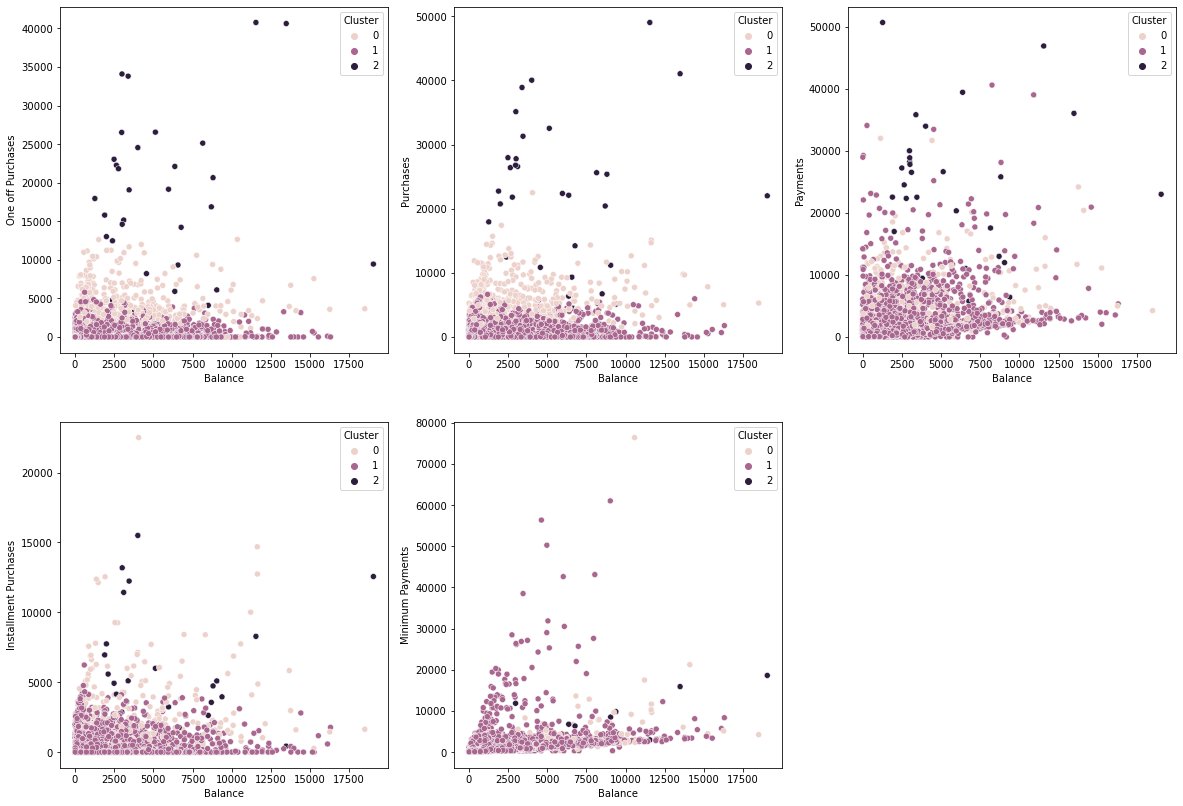

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
sns.scatterplot(data=df, x='BALANCE', y='ONEOFF_PURCHASES', hue='Cluster')
plt.xlabel('Balance')
plt.ylabel('One off Purchases')

plt.subplot(2,3,2)
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='Cluster')
plt.xlabel('Balance')
plt.ylabel('Purchases')

plt.subplot(2,3,3)
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS', hue='Cluster')
plt.xlabel('Balance')
plt.ylabel('Payments')

plt.subplot(2,3,4)
sns.scatterplot(data=df, x='BALANCE', y='INSTALLMENTS_PURCHASES', hue='Cluster')
plt.xlabel('Balance')
plt.ylabel('Installment Purchases')

plt.subplot(2,3,5)
sns.scatterplot(data=df, x='BALANCE', y='MINIMUM_PAYMENTS', hue='Cluster')
plt.xlabel('Balance')
plt.ylabel('Minimum Payments')
plt.show()

In [397]:
strategic_group=df.groupby('Cluster')[['CREDIT_LIMIT','BALANCE','PAYMENTS','MINIMUM_PAYMENTS','PURCHASES']]
total_customers=strategic_group.size()
strategic_group=strategic_group.mean()
strategic_group['total_customers']=total_customers
strategic_group

,CREDIT_LIMIT,BALANCE,PAYMENTS,MINIMUM_PAYMENTS,PURCHASES,total_customers
Cluster,,,,,,
0,7891.311755,2694.681688,4717.891225,1313.884164,5050.372078,587
1,4215.932957,1468.024168,1441.085691,801.275844,633.378239,8321
2,12386.585366,4995.708634,18315.908655,3006.555014,18140.841951,41
